### Projeto Final de Spark - Visualizações - Nível Básico

In [1]:
from pyspark.sql.functions import *

#### Primeira visualização

In [2]:
visualizacao1 = spark.table('visualizacao1')
visualizacao1\
    .withColumn('casos_recuperados', format_number('casos_recuperados', 0))\
    .withColumn('casos_recuperados', regexp_replace('casos_recuperados', ',', '.')) \
    .withColumn('em_acompanhamento', format_number('em_acompanhamento', 0))\
    .withColumn('em_acompanhamento', regexp_replace('em_acompanhamento', ',', '.')) \
    .withColumnRenamed('casos_recuperados', 'Casos Recuperados')\
    .withColumnRenamed('em_acompanhamento', 'Em acompanhamento')\
    .show()

+-----------------+-----------------+
|Casos Recuperados|Em acompanhamento|
+-----------------+-----------------+
|       17.262.646|        1.065.477|
+-----------------+-----------------+



#### Segunda visualização

In [3]:
visualizacao2 = spark.read.load('/user/covidbr/visualizacao2')

print('CASOS CONFIRMADOS')
visualizacao2\
    .withColumn('acumulado', format_number('acumulado', 0))\
    .withColumn('acumulado', regexp_replace('acumulado', ',', '.')) \
    .withColumn('casos_novos', format_number('casos_novos', 0))\
    .withColumn('casos_novos', regexp_replace('casos_novos', ',', '.')) \
    .withColumn('incidencia', format_number('incidencia', 1))\
    .withColumn('incidencia', regexp_replace('incidencia', ',', '')) \
    .withColumn('incidencia', regexp_replace('incidencia', '\.', ',')) \
    .withColumnRenamed('acumulado', 'Acumulado')\
    .withColumnRenamed('casos_novos', 'Casos Novos')\
    .withColumnRenamed('incidencia', 'Incidência')\
    .show()

CASOS CONFIRMADOS
+----------+-----------+----------+
| Acumulado|Casos Novos|Incidência|
+----------+-----------+----------+
|18.855.015|     62.504|    8972,3|
+----------+-----------+----------+



#### Terceira visualização

In [4]:
visualizacao3 = spark.read.load('/user/covidbr/visualizacao3')

print('ÓBITOS CONFIRMADOS')
visualizacao3\
    .withColumn('obitos_acumulados', format_number('obitos_acumulados', 0))\
    .withColumn('obitos_acumulados', regexp_replace('obitos_acumulados', ',', '.')) \
    .withColumn('casos_novos', format_number('casos_novos', 0))\
    .withColumn('casos_novos', regexp_replace('casos_novos', ',', '.')) \
    .withColumn('letalidade', format_number(col('letalidade') * 100, 1))\
    .withColumn('letalidade', regexp_replace('letalidade', ',', '')) \
    .withColumn('letalidade', regexp_replace('letalidade', '\.', ',')) \
    .withColumn('letalidade', concat(col('letalidade'), lit('%'))) \
    .withColumn('mortalidade', format_number('mortalidade', 1))\
    .withColumn('mortalidade', regexp_replace('mortalidade', ',', '')) \
    .withColumn('mortalidade', regexp_replace('mortalidade', '\.', ',')) \
    .withColumnRenamed('obitos_acumulados', 'Óbitos acumulados')\
    .withColumnRenamed('casos_novos', 'Casos Novos')\
    .withColumnRenamed('letalidade', 'Letalidade')\
    .withColumnRenamed('mortalidade', 'Mortalidade')\
    .show()

ÓBITOS CONFIRMADOS
+-----------------+-----------+----------+-----------+
|Óbitos acumulados|Casos Novos|Letalidade|Mortalidade|
+-----------------+-----------+----------+-----------+
|          526.892|      1.780|      2,8%|      250,7|
+-----------------+-----------+----------+-----------+



#### Quarta visualização

In [5]:
visualizacao4 = spark.read.load('/user/covidbr/visualizacao4')

print('Síntese de casos, óbitos, incidência e mortalidade')
visualizacao4\
    .withColumn('casos', format_number('casos', 0))\
    .withColumn('casos', regexp_replace('casos', ',', '.')) \
    .withColumn('obitos', format_number('obitos', 0))\
    .withColumn('obitos', regexp_replace('obitos', ',', '.')) \
    .withColumn('incidencia', format_number('incidencia', 1))\
    .withColumn('incidencia', regexp_replace('incidencia', ',', '')) \
    .withColumn('incidencia', regexp_replace('incidencia', '\.', ',')) \
    .withColumn('mortalidade', format_number('mortalidade', 1))\
    .withColumn('mortalidade', regexp_replace('mortalidade', ',', '')) \
    .withColumn('mortalidade', regexp_replace('mortalidade', '\.', ',')) \
    .withColumn('ordenador', when(col('regiao') == 'Brasil', 0)\
                            .when(col('regiao') == 'Sul', 1)\
                            .when(col('regiao') == 'Centro-Oeste', 2)\
                            .when(col('regiao') == 'Norte', 3)\
                            .when(col('regiao') == 'Nordeste', 4)\
                            .when(col('regiao') == 'Sudeste', 5)\
                            .otherwise(999))\
    .orderBy('ordenador')\
    .drop('ordenador')\
    .withColumnRenamed('regiao', 'Região')\
    .withColumnRenamed('casos', 'Casos')\
    .withColumnRenamed('obitos', 'Óbitos')\
    .withColumnRenamed('incidencia', 'Incidência/100mil hab.')\
    .withColumnRenamed('mortalidade', 'Mortalidade/100mil hab.')\
    .withColumnRenamed('atualizacao', 'Atualização')\
    .show()

Síntese de casos, óbitos, incidência e mortalidade
+------------+----------+-------+----------------------+-----------------------+----------------+
|      Região|     Casos| Óbitos|Incidência/100mil hab.|Mortalidade/100mil hab.|     Atualização|
+------------+----------+-------+----------------------+-----------------------+----------------+
|      Brasil|18.855.015|526.892|                8972,3|                  250,7|06/07/2021 00:00|
|         Sul| 7.222.082|161.410|               12046,4|                  269,2|06/07/2021 00:00|
|Centro-Oeste| 3.833.238| 98.414|               11760,5|                  301,9|06/07/2021 00:00|
|       Norte| 3.465.630| 87.690|                9401,6|                  237,9|06/07/2021 00:00|
|    Nordeste| 8.911.474|215.648|                7807,3|                  188,9|06/07/2021 00:00|
|     Sudeste|14.277.606|490.622|                8078,2|                  277,6|06/07/2021 00:00|
+------------+----------+-------+----------------------+-----------

### Gráficos
#### Casos novos de COVID-19 por data de notificação

In [6]:
covid_br = spark.table('covid_br')

[]

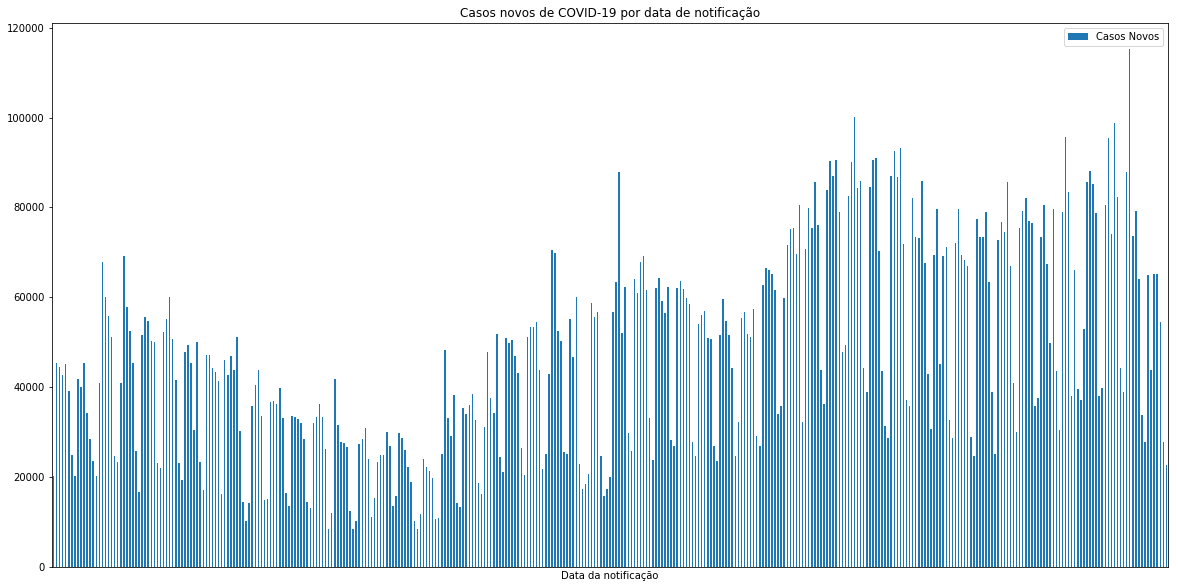

In [9]:
covid_br\
    .where('data is not null and regiao = "Brasil"')\
    .select('casosNovos', 'data')\
    .groupBy("data")\
    .agg(
        sum("casosNovos").alias("casosNovos")
    )\
    .orderBy('data')\
    .withColumnRenamed('casosNovos', 'Casos Novos')\
    .withColumnRenamed('data', 'Data da notificação')\
    .toPandas()[-366:-1]\
    .plot.bar(\
              x='Data da notificação',\
              y='Casos Novos',\
              title='Casos novos de COVID-19 por data de notificação',\
              figsize=(20,10)
             ).set_xticks([])

#### Casos e óbitos acumulados de COVID-19 por data de notificação

[]

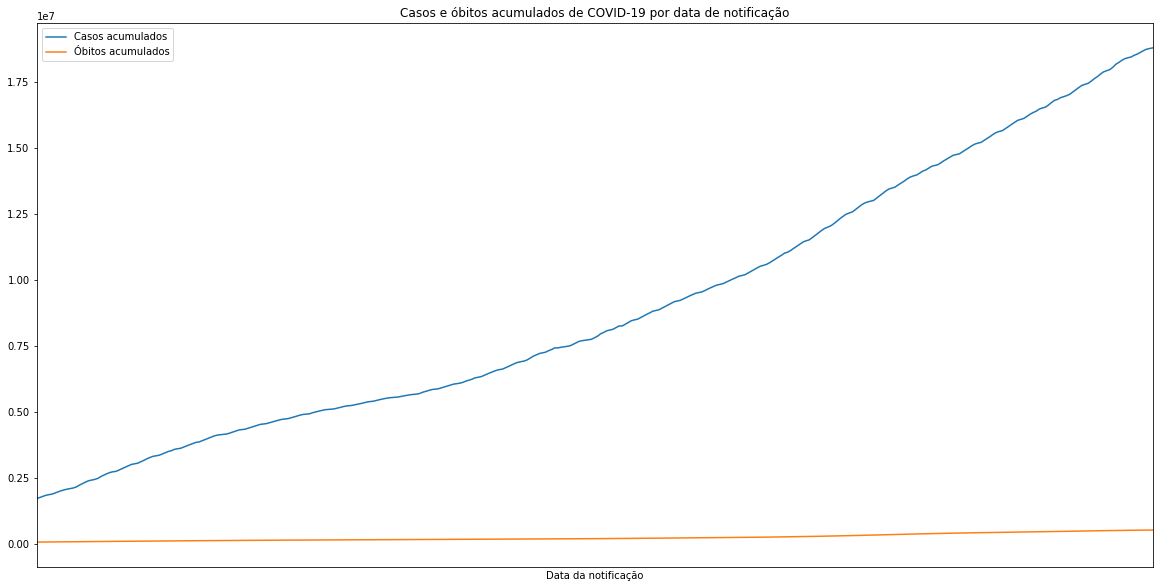

In [10]:
covid_br\
    .where('data is not null and regiao = "Brasil"')\
    .select('casosAcumulado', 'obitosAcumulado', 'data')\
    .orderBy('data')\
    .withColumnRenamed('casosAcumulado', 'Casos acumulados')\
    .withColumnRenamed('obitosAcumulado', 'Óbitos acumulados')\
    .withColumnRenamed('data', 'Data da notificação')\
    .toPandas()[-366:-1]\
    .plot.line(\
              x='Data da notificação',\
              y=['Casos acumulados', 'Óbitos acumulados'],\
              title='Casos e óbitos acumulados de COVID-19 por data de notificação',\
              figsize=(20,10)
             ).set_xticks([])

#### Casos acumulados por região de COVID-19 por data de notificação

[]

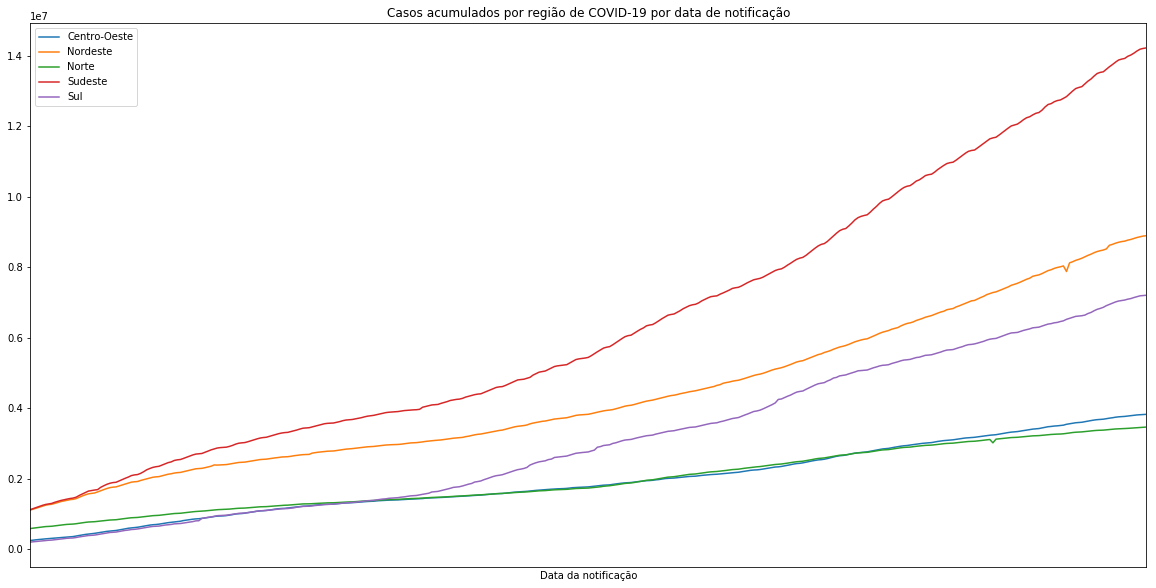

In [11]:
covid_br\
    .where('data is not null and regiao <> "Brasil"')\
    .select('regiao', 'casosAcumulado', 'data')\
    .groupBy('data')\
    .pivot("regiao")\
    .sum("casosAcumulado").alias("casosAcumulado")\
    .orderBy('data')\
    .withColumnRenamed('casosAcumulado', 'Casos acumulados')\
    .withColumnRenamed('data', 'Data da notificação')\
    .toPandas()[-366:-1]\
    .plot.line(\
              x='Data da notificação',\
              title='Casos acumulados por região de COVID-19 por data de notificação',\
              figsize=(20,10)
             ).set_xticks([])